# Recommender system for a medical supplies company

## In this lesson, we will try to help the company achieve increased sales with the Recommender System

<img src=https://medeor.de/dateien/Non-Profit-Pharmaceuticals/action-medeor-medezinische-verbrauchsmaterialien-geraete.jpg width='400'>

In [1]:
import pandas as pd
import numpy as np
#pd.set_option("display.max_columns",181)
#pd.set_option("display.max_rows",None)

In [2]:
df=pd.read_csv('PBL 5 recommendation data.csv', encoding = "latin-1")

/var/folders/wf/_mmf6yj90nn619dsdnspr0f80000gn/T/ipykernel_11528/2523482958.py:1: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('PBL 5 recommendation data.csv', encoding = "latin-1")


In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [4]:
df.shape

(4194, 181)

In [5]:
# We delete columns with more than 80% NaN
nan_percentages = df.isna().mean() * 100

columns_to_drop = nan_percentages[nan_percentages > 80].index

df = df.drop(columns=columns_to_drop)

In [6]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,...,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.handling_time,Products.size,Products.family_id,Products.saved_status
0,797,Christy,Dill,1426018724,NaN,1437764306,0.0,3758,797,Christy,...,0.0,136.0,0.0,24.80,7.50,30.40,NaN,NaN,PF61071,0.0
1,3,John,Smith,1386089139,NaN,1437764354,0.0,23,3,John,...,0.0,0.0,0.0,8.00,7.00,1.50,NaN,NaN,PF02132,NaN
2,3,John,Smith,1386089139,NaN,1437764354,0.0,9531,3,John,...,0.0,NaN,NaN,13.23,10.04,10.24,NaN,2 x Extra large,PF00342,0.0
3,4,James,Anderson,1386780263,NaN,1437762646,0.0,29,4,James,...,0.0,NaN,NaN,10.60,7.80,18.50,NaN,NaN,PF04970,NaN
4,5,Abraham,Pollak,1386861599,0.0,1437764316,0.0,30,5,Abraham,...,0.0,NaN,NaN,8.50,2.75,12.00,NaN,NaN,PF03045,NaN


In [7]:
df.shape

(4194, 103)

## We find the Most Popular Product in Dollars and quantity

In [8]:
import matplotlib.pyplot as plt

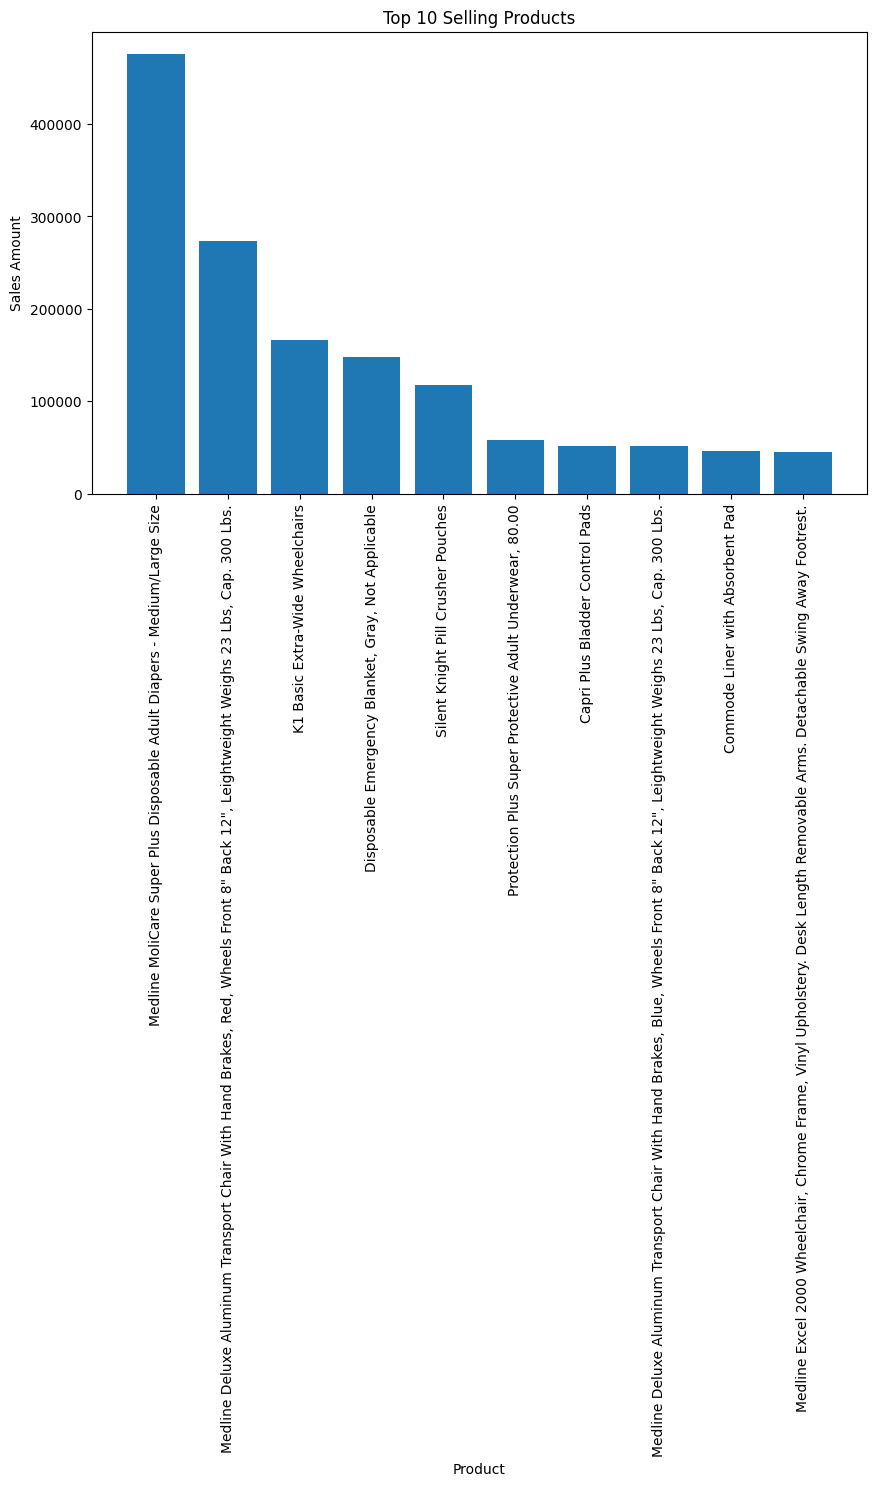

In [9]:
import matplotlib.pyplot as plt

# Group data and calculate total volumes and sales amounts
product_sales = df.groupby('Order_Items.product_name').agg({'Order_Items.qty': 'sum', 'Order_Items.price': 'sum'})


# Calculate sales amount
product_sales['Total_Sales'] = product_sales['Order_Items.qty'] * product_sales['Order_Items.price']

# Select the top 10 selling products
top_10_products = product_sales.nlargest(10, 'Total_Sales')

# Creating graphics
plt.figure(figsize=(10, 6))
plt.bar(top_10_products.index, top_10_products['Total_Sales'])
plt.xlabel('Product')
plt.ylabel('Sales Amount')
plt.title('Top 10 Selling Products')
plt.xticks(rotation=90)
plt.show()


#### Medline MolicareSuper Plus is the best seller by quantity and dollar


## We are looking at the Product with maximum purchases

In [10]:
most_popular=df.groupby('Order_Items.product_name').agg({'Order_Items.qty':[np.size,np.sum,np.mean]})

/var/folders/wf/_mmf6yj90nn619dsdnspr0f80000gn/T/ipykernel_11528/2153518582.py:1: FutureWarning: The provided callable <function sum at 0x105f02980> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  most_popular=df.groupby('Order_Items.product_name').agg({'Order_Items.qty':[np.size,np.sum,np.mean]})
/var/folders/wf/_mmf6yj90nn619dsdnspr0f80000gn/T/ipykernel_11528/2153518582.py:1: FutureWarning: The provided callable <function mean at 0x105f03a60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  most_popular=df.groupby('Order_Items.product_name').agg({'Order_Items.qty':[np.size,np.sum,np.mean]})


In [11]:
most_popular.head()

Order_Items.qty         
                                                              size sum mean
Order_Items.product_name                                                   
 BUCKET, REPLACEMENT FOR MDS89668XW                              1   1  1.0
1 Box Of Medline Commode Liners with Absorbent Pad               1   2  2.0
1 Pad of CURAD Mediplast Wart Pad                                1   1  1.0
1-Ply Blockade AngelStat Surgical Gowns, Ceil B...               1   1  1.0
1/2" self-adhesive hook material, 25 yard dispe...               1   1  1.0

In [12]:
most_popular1=most_popular.sort_values(('Order_Items.qty','mean'),ascending=False)

In [13]:
most_popular1.head()

Order_Items.qty            
                                                              size  sum   mean
Order_Items.product_name                                                      
TruTemp                                                          1  500  500.0
2-Ply Tissue/Poly Professional Towels, White, N...               2  220  110.0
Sanitary Pads with Adhesive & Wings                              2  133   66.5
Remedy Basics Moisturizing Body Lotion, 118.00 ML                1   40   40.0
MPHSAFETY21Z                                                     1   24   24.0

In [14]:
grouped_sum=most_popular['Order_Items.qty']['sum'].sum()

In [15]:
most_popular1['percentage']=most_popular['Order_Items.qty']['sum'].div(grouped_sum)*100

In [16]:
most_popular1.head()

Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
TruTemp                                                          1  500   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   
Sanitary Pads with Adhesive & Wings                              2  133   
Remedy Basics Moisturizing Body Lotion, 118.00 ML                1   40   
MPHSAFETY21Z                                                     1   24   

                                                          percentage  
                                                     mean             
Order_Items.product_name                                              
TruTemp                                             500.0   6.413545  
2-Ply Tissue/Poly Professional Towels, White, N...  110.0   2.821960  
Sanitary Pads with Adhesive & Wings                  66.5   1.706003  
Remedy Basics Moisturizing Body Lotion, 118.00 ML    40.0   0.513084  
MPHSAFETY21Z                                         24.0   0.307850

In [17]:
most_popular1['Rank']=most_popular1['percentage'].rank(ascending=False)

In [18]:
most_popular1.head()

Order_Items.qty       \
                                                              size  sum   
Order_Items.product_name                                                  
TruTemp                                                          1  500   
2-Ply Tissue/Poly Professional Towels, White, N...               2  220   
Sanitary Pads with Adhesive & Wings                              2  133   
Remedy Basics Moisturizing Body Lotion, 118.00 ML                1   40   
MPHSAFETY21Z                                                     1   24   

                                                          percentage  Rank  
                                                     mean                   
Order_Items.product_name                                                    
TruTemp                                             500.0   6.413545   1.0  
2-Ply Tissue/Poly Professional Towels, White, N...  110.0   2.821960   3.0  
Sanitary Pads with Adhesive & Wings                  66.5   1.706003   5.0  
Remedy Basics Moisturizing Body Lotion, 118.00 ML    40.0   0.513084  16.0  
MPHSAFETY21Z                                         24.0   0.307850  35.0

In [19]:
product_volumes = df.groupby('Order_Items.product_name')['Order_Items.qty'].sum().sort_values(ascending=False).head(20)

In [20]:
most_popular_product = product_volumes.idxmax()

In [21]:
most_popular_product

'TruTemp'

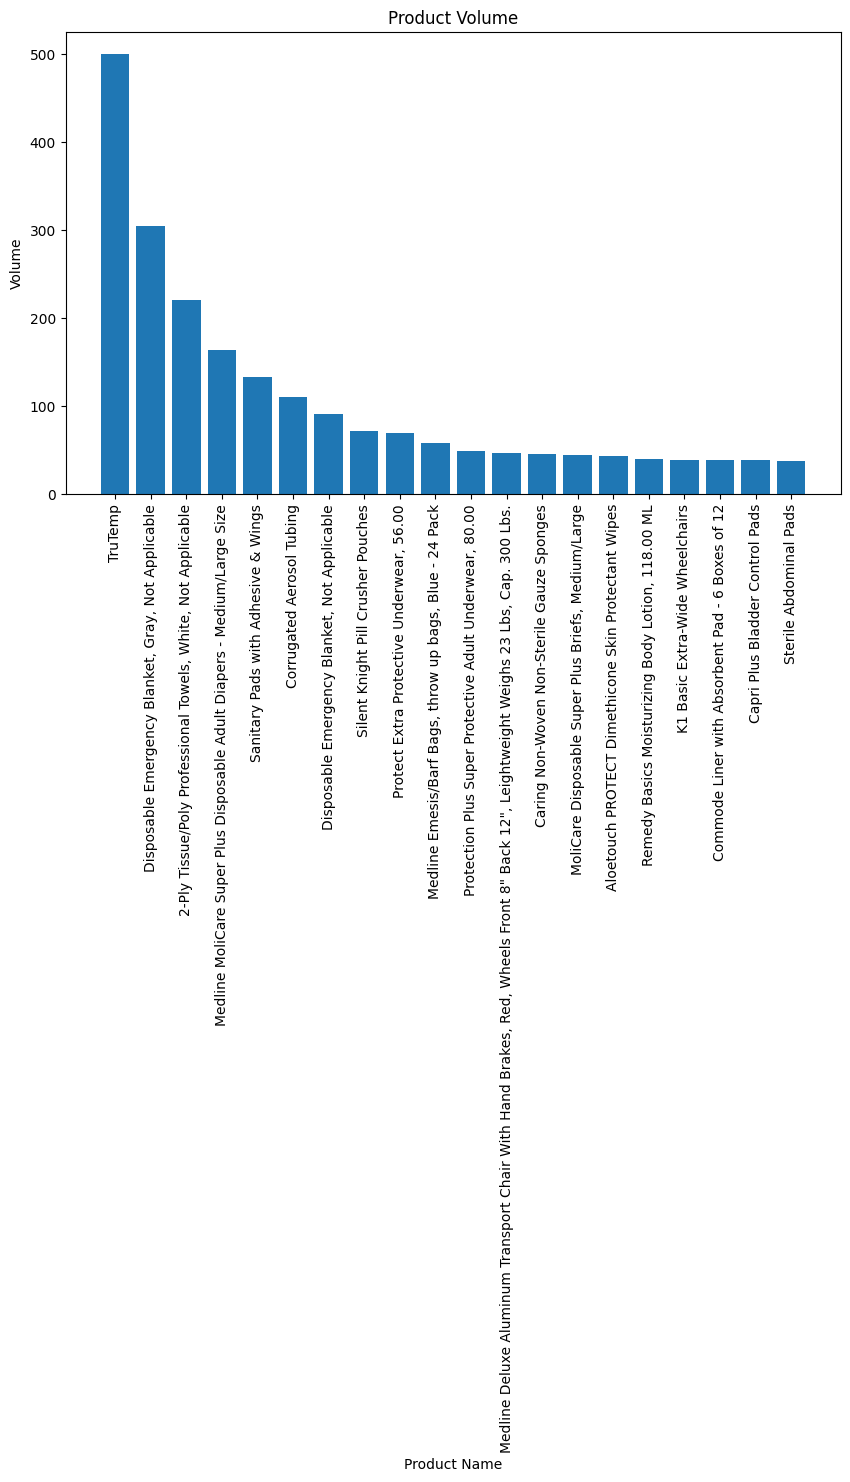

In [22]:
import matplotlib.pyplot as plt

sorted_product_volumes = product_volumes.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(sorted_product_volumes.index, sorted_product_volumes.values)
plt.xlabel('Product Name')
plt.ylabel('Volume')
plt.title('Product Volume')
plt.xticks(rotation=90)
plt.show()                                

#### The product with the maximum purchase is Tru Temp


### According to these values, the most popular products are introduced to a customer who enters the website for the first time. According to our results, these are 'TruTemp', '2-Ply Tissue/Poly Professional Towels, White, Not Applicable' and so on

## Matrix Factorization

In [23]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,...,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.handling_time,Products.size,Products.family_id,Products.saved_status
0,797,Christy,Dill,1426018724,NaN,1437764306,0.0,3758,797,Christy,...,0.0,136.0,0.0,24.80,7.50,30.40,NaN,NaN,PF61071,0.0
1,3,John,Smith,1386089139,NaN,1437764354,0.0,23,3,John,...,0.0,0.0,0.0,8.00,7.00,1.50,NaN,NaN,PF02132,NaN
2,3,John,Smith,1386089139,NaN,1437764354,0.0,9531,3,John,...,0.0,NaN,NaN,13.23,10.04,10.24,NaN,2 x Extra large,PF00342,0.0
3,4,James,Anderson,1386780263,NaN,1437762646,0.0,29,4,James,...,0.0,NaN,NaN,10.60,7.80,18.50,NaN,NaN,PF04970,NaN
4,5,Abraham,Pollak,1386861599,0.0,1437764316,0.0,30,5,Abraham,...,0.0,NaN,NaN,8.50,2.75,12.00,NaN,NaN,PF03045,NaN


In [24]:
df2=df.pivot_table(index=['Customers.id'],columns=['Order_Items.product_name'],values='Order_Items.qty')

In [25]:
df2

Order_Items.product_name,"BUCKET, REPLACEMENT FOR MDS89668XW",1 Box Of Medline Commode Liners with Absorbent Pad,1 Pad of CURAD Mediplast Wart Pad,"1-Ply Blockade AngelStat Surgical Gowns, Ceil Blue, Extra Large","1/2"" self-adhesive hook material, 25 yard dispenser box, white","1/2"" self-adhesive loop material, 25 yard dispenser box, white","100% Cotton Unisex Reversible Hyperbaric Scrub Tops, Misty Green, MZS","100% Cotton Unisex Reversible Tops, Ceil Blue, MHS",10215-s,12112-3,...,"Wrist and Forearm Splints, Medium","Youth Two-Button Folding Walkers with 5"" Wheels, 5""",Youth-Sized Walker Platform Attachment,"Zip-Style Biohazard Specimen Bags, Clear",g222-0913,"iWalker Euro Style Rollator, Red","medline Freedom Plus Extra Wide Transport Chair With hand Brakes, Red, Cap. 400 Lbs, Seat Size 22""/18"", Includes Cup Holder.",mmm15330zz,"sEMG - MyoTrac Home Trainer with Myoscan Active Sensor and extender cable, 1-channel","sEMG - single use uni-gel electrodes only, case of 100"
Customers.id,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df2=df2.fillna(0)
df2

Order_Items.product_name,"BUCKET, REPLACEMENT FOR MDS89668XW",1 Box Of Medline Commode Liners with Absorbent Pad,1 Pad of CURAD Mediplast Wart Pad,"1-Ply Blockade AngelStat Surgical Gowns, Ceil Blue, Extra Large","1/2"" self-adhesive hook material, 25 yard dispenser box, white","1/2"" self-adhesive loop material, 25 yard dispenser box, white","100% Cotton Unisex Reversible Hyperbaric Scrub Tops, Misty Green, MZS","100% Cotton Unisex Reversible Tops, Ceil Blue, MHS",10215-s,12112-3,...,"Wrist and Forearm Splints, Medium","Youth Two-Button Folding Walkers with 5"" Wheels, 5""",Youth-Sized Walker Platform Attachment,"Zip-Style Biohazard Specimen Bags, Clear",g222-0913,"iWalker Euro Style Rollator, Red","medline Freedom Plus Extra Wide Transport Chair With hand Brakes, Red, Cap. 400 Lbs, Seat Size 22""/18"", Includes Cup Holder.",mmm15330zz,"sEMG - MyoTrac Home Trainer with Myoscan Active Sensor and extender cable, 1-channel","sEMG - single use uni-gel electrodes only, case of 100"
Customers.id,,,,,,,,,,,,,,,,,,,,,
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df2['TruTemp']

Customers.id
3       0.0
4       0.0
5       0.0
7       0.0
8       0.0
       ... 
3730    0.0
3732    0.0
3733    0.0
3735    0.0
3736    0.0
Name: TruTemp, Length: 3054, dtype: float64

In [28]:
TruTemp_=df2['TruTemp']

In [29]:
TruTemp_.value_counts()

TruTemp
0.0      3053
500.0       1
Name: count, dtype: int64

In [30]:
df2[['2-Ply Tissue/Poly Professional Towels, White, Not Applicable','TruTemp']].corr() 

Order_Items.product_name,"2-Ply Tissue/Poly Professional Towels, White, Not Applicable",TruTemp
Order_Items.product_name,,
"2-Ply Tissue/Poly Professional Towels, White, Not Applicable",1.000000,-0.000328
TruTemp,-0.000328,1.000000


In [31]:
df2.corrwith(TruTemp_) 

Order_Items.product_name
 BUCKET, REPLACEMENT FOR MDS89668XW                                                                                             -0.000328
1 Box Of Medline Commode Liners with Absorbent Pad                                                                              -0.000328
1 Pad of CURAD Mediplast Wart Pad                                                                                               -0.000328
1-Ply Blockade AngelStat Surgical Gowns, Ceil Blue, Extra Large                                                                 -0.000328
1/2" self-adhesive hook material, 25 yard dispenser box, white                                                                  -0.000328
                                                                                                                                   ...   
iWalker Euro Style Rollator, Red                                                                                                -0.000328
medline F

In [32]:
similar_df2=df2.corrwith(TruTemp_)

In [33]:
similar_df2=similar_df2.dropna()

In [34]:
similar_df2.sort_values(ascending=False)

Order_Items.product_name
TruTemp                                                                                                                               1.000000
Phlebotomy Sharps Containers, Red, 1.000 QT                                                                                           0.707028
CanDo&reg; Latex Free Exercise Band - 50 yard roll - Green - medium                                                                  -0.000328
2-Ply Tissue/Poly Professional Towels, White, Not Applicable                                                                         -0.000328
CURAD Stretch Vinyl Exam Gloves, Medium                                                                                              -0.000328
                                                                                                                                        ...   
Medline Emesis/Barf Bags, Blue - 24 Pack                                                                             

## Judging by the sales figures, the product named Phlebotomy Sharps Containers, Red, 1.000 QT was the closest correlation to the TruTemp product. In other words, looking at maxfactorization, Phlebotomy Sharps Containers, Red, 1.000 QT can be recommended to anyone who buys TruTemp

## Cosine Similiraty

In [35]:
df3=df.groupby('Customers.id').agg({'Order_Items.qty':[np.size,np.mean]})

/var/folders/wf/_mmf6yj90nn619dsdnspr0f80000gn/T/ipykernel_11528/564941562.py:1: FutureWarning: The provided callable <function mean at 0x105f03a60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df3=df.groupby('Customers.id').agg({'Order_Items.qty':[np.size,np.mean]})


In [36]:
df3

Order_Items.qty     
                        size mean
Customers.id                     
3                          2  2.5
4                          1  1.0
5                          3  1.0
7                          1  1.0
8                          1  1.0
...                      ...  ...
3730                       1  1.0
3732                       1  1.0
3733                       1  1.0
3735                       1  1.0
3736                       1  2.0

[3054 rows x 2 columns]

In [37]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
numeric_data = df3.select_dtypes(include='number')   
cosine_sim_matrix = cosine_similarity(numeric_data)

In [39]:
cosine_sim_matrix

array([[1.        , 0.99388373, 0.83957016, ..., 0.99388373, 0.99388373,
        0.97780241],
       [0.99388373, 1.        , 0.89442719, ..., 1.        , 1.        ,
        0.9486833 ],
       [0.83957016, 0.89442719, 1.        , ..., 0.89442719, 0.89442719,
        0.70710678],
       ...,
       [0.99388373, 1.        , 0.89442719, ..., 1.        , 1.        ,
        0.9486833 ],
       [0.99388373, 1.        , 0.89442719, ..., 1.        , 1.        ,
        0.9486833 ],
       [0.97780241, 0.9486833 , 0.70710678, ..., 0.9486833 , 0.9486833 ,
        1.        ]])